In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
vendas_df = pd.read_csv(r'Vendas2.csv', sep=';')

vendas_df['Valor Final'] = vendas_df['Valor Final'].str.replace('R$', '', regex=False).str.strip()
vendas_df['Valor Final'] = vendas_df['Valor Final'].str.replace('.', '', regex=False).str.replace(',', '.')

vendas_df['Valor Final'] = vendas_df['Valor Final'].astype(float)

vendas_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código Venda    42 non-null     int64  
 1   Data            42 non-null     object 
 2   ID Loja         42 non-null     object 
 3   Produto         42 non-null     object 
 4   Quantidade      42 non-null     int64  
 5   Valor Unitário  42 non-null     object 
 6   Valor Final     42 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ KB


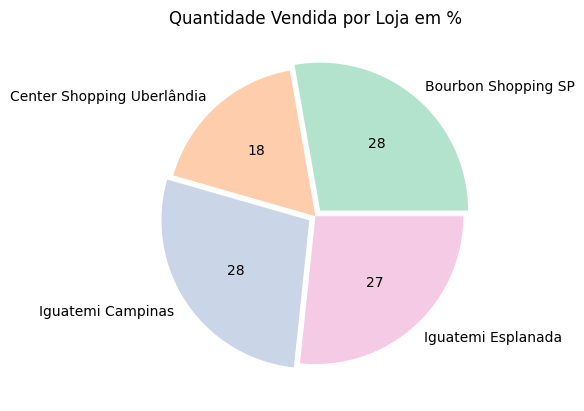

In [14]:
from cycler import cycler

vendas_lojas = vendas_df.groupby('ID Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade']]

cores= plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

destaques = [0.05,0,0.05,0]

loja_vendas = vendas_lojas.index
qtde_vendida = vendas_lojas['Quantidade']

plt.title('Quantidade Vendida por Loja em %')
plt.pie(qtde_vendida, labels=loja_vendas, autopct='%.f', explode=destaques)

plt.show()

C:\Users\Fernando Moreno\AppData\Local\Temp\ipykernel_12328\4078516079.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(qtde_produto[posicao], xy=(produtos[posicao], qtde_produto[posicao]),


<function matplotlib.pyplot.show(close=None, block=None)>

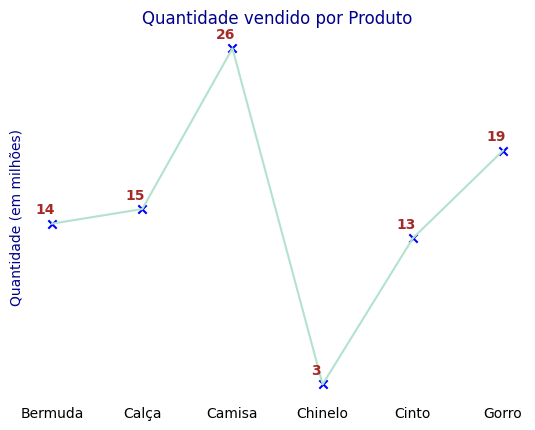

In [16]:
vendas_produtos = vendas_df.groupby('Produto').sum()
vendas_produtos = vendas_produtos[['Quantidade']]
#display(vendas_produtos)

produtos = vendas_produtos.index
qtde_produto = vendas_produtos['Quantidade']

plt.plot(produtos, qtde_produto, color=cores[0])

plt.scatter(produtos, qtde_produto, marker='x', color='blue')

for posicao in range(len(produtos)):
    plt.annotate(qtde_produto[posicao], xy=(produtos[posicao], qtde_produto[posicao]), 
                 xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom',
                 color='brown', weight='bold')

plt.ylabel('Quantidade (em milhões)', color='darkblue')
plt.box(False)
plt.yticks([])

plt.title('Quantidade vendido por Produto', color='darkblue')
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.grid(False)

plt.show

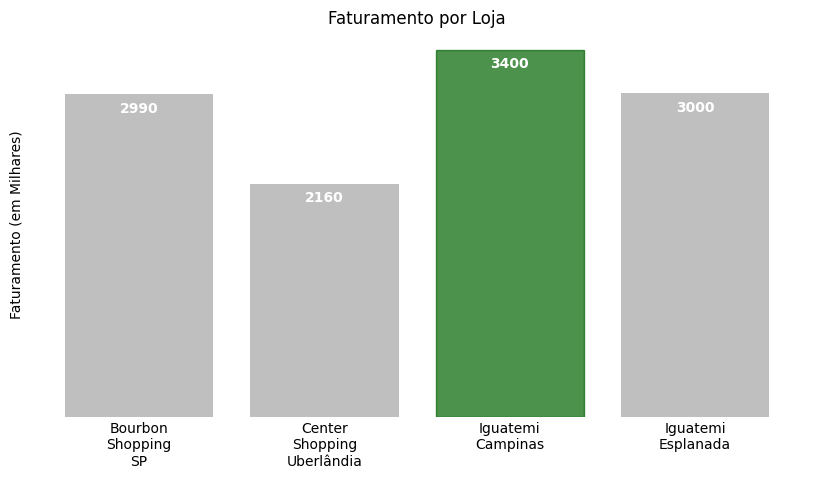

In [10]:

faturamento_loja = vendas_df.groupby('ID Loja').sum()
faturamento_loja = faturamento_loja[['Valor Final']]

lojas = faturamento_loja.index
valores = faturamento_loja['Valor Final']

lojas = [loja.replace(' ', '\n') for loja in faturamento_loja.index]

plt.figure(figsize=(10, 5))

barras = plt.bar(lojas, valores, color='gray', alpha=0.5)

barras[2].set_color('darkgreen')
barras[2].set_alpha(0.7)


#for i, v in enumerate(valores):
    #plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.bar_label(barras, fontweight='bold', color='white', padding=-15)

plt.tick_params(axis='x', length=0)
plt.box(False)
plt.yticks([])
#plt.xlabel('Lojas')
plt.ylabel('Faturamento (em Milhares)')
plt.title('Faturamento por Loja')
plt.show()  # Mostrar o gráfico
